In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import zscore
import os
import mass_ts as mts # https://github.com/matrix-profile-foundation/mass-ts
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import pandas as pd

from experimentsetup import *
from preprocessingandrecords import *
from tqdm import tqdm

main_dir = "BVDCaseWestern/"
CYCLELEN = 1000 # (original data is sampled at 12,000 Hz)
NUMPAT = 3
SENSOR_root = 'FE_time'
exp = Experiment("PRECIS", [NUMPAT, CYCLELEN])

In [4]:
filename = "anomalydetectiondata.mat"
data = loadmat(filename)
Td = data['patterns'] # patterns from the normal trace behavior (no anomaly)
trace = data['syntheticdata'][0] # 11 minute trace with 32 seconds of anomalous load
dps = data['distanceprofiles'] # under T_d[3,1000] slid across the trace using MASS
# PRECISDP = data['PRECISprofile'][0] # the median of each time step squared
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'patterns', 'syntheticdata', 'distanceprofiles', 'PRECISprofile', 'highloadstart', 'highloadend'])


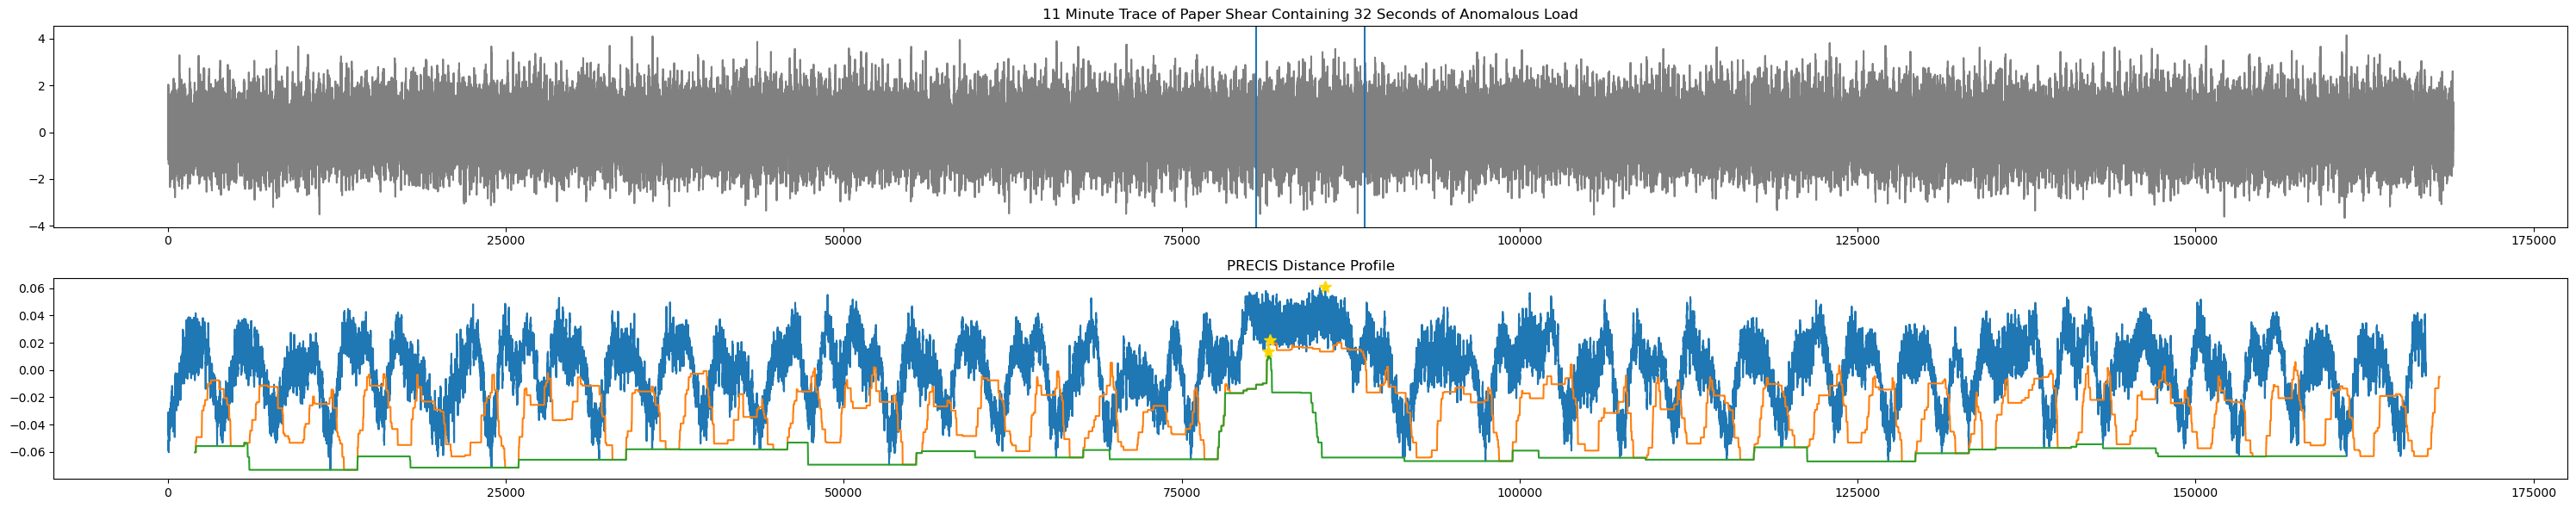

In [9]:
fig = plt.figure(figsize=(30,6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax3 = plt.subplot(212, sharex = ax1)
ax4 = plt.subplot(212, sharex = ax1)

ax1.plot(trace,c='grey')
ax1.axvline(x=data['highloadstart']) 
ax1.axvline(x=data['highloadend'])
ax1.set_title("11 Minute Trace of Paper Shear Containing 32 Seconds of Anomalous Load")

PRECISDP = np.mean(dps,axis=0)
PRECISdistprofile = movemean(zscore(PRECISDP,nan_policy="omit"),CYCLELEN)
ax2.plot(PRECISdistprofile)
ax2.set_title("PRECIS Distance Profile")
ax2.plot(np.argmax(PRECISdistprofile),max(PRECISdistprofile),marker="*",c="gold",markersize=10.0)

PRECISdistprofile_2 = movemin(PRECISdistprofile,CYCLELEN)
ax3.plot(np.arange(CYCLELEN*2,len(PRECISdistprofile_2)+CYCLELEN*2),PRECISdistprofile_2) # if you want to smooth for clarity
ax3.plot(np.argmax(PRECISdistprofile_2)+CYCLELEN*2,max(PRECISdistprofile_2),marker="*",c="gold",markersize=10.0) # if you want to smooth for clarity

PRECISdistprofile_3 = movemin(PRECISdistprofile,CYCLELEN*8)
ax4.plot(np.arange(CYCLELEN*2,len(PRECISdistprofile_3)+CYCLELEN*2),PRECISdistprofile_3) # if you want to smooth for clarity
ax4.plot(np.argmax(PRECISdistprofile_3)+CYCLELEN*2,max(PRECISdistprofile_3),marker="*",c="gold",markersize=10.0) # if you want to smooth for clarity
plt.savefig("AD_PRECISdistprof.svg",dpi=80)
plt.show()